In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras import regularizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

Using TensorFlow backend.


In [2]:
flight_arrivals = pd.read_csv('Arriving Data.csv')
flight_arrivals.drop('NewMsgTime',axis=1,inplace=True)
flight_arrivals.head(30)

,FltNbr,AircraftType,SchedDepTime,SchedArrTime,BlockArrDate,BlockArrTime,MsgDate,MsgTime,NewMsgDate,BlockDepDate,...,VV,N,U,WW,IX,M,R,S,O,Y
0,4,321,715,830,231112.0,838,231112,722,231112,231112,...,61.0,8.0,91.0,81,7.0,0.0,1.0,0.0,0.0,0.0
1,4,321,715,830,231112.0,838,231112,733,231112,231112,...,61.0,8.0,91.0,81,7.0,0.0,1.0,0.0,0.0,0.0
2,4,321,715,830,231112.0,838,231112,756,231112,231112,...,61.0,8.0,91.0,81,7.0,0.0,1.0,0.0,0.0,0.0
3,4,321,715,830,231112.0,838,231112,817,231112,231112,...,61.0,8.0,91.0,81,7.0,0.0,1.0,0.0,0.0,0.0
4,4,321,715,830,231112.0,838,231112,824,231112,231112,...,61.0,8.0,91.0,81,7.0,0.0,1.0,0.0,0.0,0.0
5,4,321,715,830,231112.0,838,231112,825,231112,231112,...,61.0,8.0,91.0,81,7.0,0.0,1.0,0.0,0.0,0.0
6,4,321,715,830,231112.0,838,231112,838,231112,231112,...,61.0,8.0,91.0,81,7.0,0.0,1.0,0.0,0.0,0.0
7,4,321,755,910,NaN,920,231112,755,231112,231112,...,59.0,8.0,93.0,62,7.0,0.0,1.0,0.0,0.0,0.0
8,4,321,755,910,NaN,920,231112,809,231112,231112,...,59.0,8.0,93.0,62,7.0,0.0,1.0,0.0,0.0,0.0
9,4,321,755,910,231112.0,920,231112,832,231112,231112,...,59.0,8.0,93.0,62,7.0,0.0,1.0,0.0,0.0,0.0


In [3]:
flight_arrivals.drop('DepCountry',axis=1,inplace=True)
flight_arrivals.drop('BlockArrDate',axis=1,inplace=True)
flight_arrivals.drop('MsgDate',axis=1,inplace=True)
flight_arrivals.drop('NewMsgDate',axis=1,inplace=True)
flight_arrivals.drop('BlockDepDate',axis=1,inplace=True)
flight_arrivals.drop('AircraftType',axis=1,inplace=True)
flight_arrivals.drop('hour',axis=1,inplace=True)
flight_arrivals.drop('  T10',axis=1,inplace=True)
flight_arrivals.drop('   WW',axis=1,inplace=True)

In [8]:
flight_arrivals.shape
flight_arrivals.head(30)

,FltNbr,SchedDepTime,SchedArrTime,BlockArrTime,MsgTime,BlockDepTime,TimeToFly,Error,STN,DD,...,P,VV,N,U,IX,M,R,S,O,Y
0,4,0.301927,0.352442,0.355235,0.306062,0.303571,0.167531,0.269950,0.0,0.191919,...,0.531915,0.731707,0.888889,0.861538,1.0,0.0,1.0,0.0,0.0,0.0
1,4,0.301927,0.352442,0.355235,0.310725,0.303571,0.164480,0.269687,0.0,0.191919,...,0.531915,0.731707,0.888889,0.861538,1.0,0.0,1.0,0.0,0.0,0.0
2,4,0.301927,0.352442,0.355235,0.320475,0.303571,0.158987,0.268370,0.0,0.191919,...,0.531915,0.731707,0.888889,0.861538,1.0,0.0,1.0,0.0,0.0,0.0
3,4,0.301927,0.352442,0.355235,0.346333,0.303571,0.155020,0.266263,0.0,0.191919,...,0.531915,0.731707,0.888889,0.861538,1.0,0.0,1.0,0.0,0.0,0.0
4,4,0.301927,0.352442,0.355235,0.349301,0.303571,0.153494,0.265736,0.0,0.191919,...,0.531915,0.731707,0.888889,0.861538,1.0,0.0,1.0,0.0,0.0,0.0
5,4,0.301927,0.352442,0.355235,0.349724,0.303571,0.152579,0.266263,0.0,0.191919,...,0.531915,0.731707,0.888889,0.861538,1.0,0.0,1.0,0.0,0.0,0.0
6,4,0.301927,0.352442,0.355235,0.355235,0.303571,0.149222,0.265736,0.0,0.191919,...,0.531915,0.731707,0.888889,0.861538,1.0,0.0,1.0,0.0,0.0,0.0
7,4,0.319058,0.386412,0.389996,0.320051,0.318027,0.168752,NaN,0.0,0.191919,...,0.545455,0.707317,0.888889,0.892308,1.0,0.0,1.0,0.0,0.0,0.0
8,4,0.319058,0.386412,0.389996,0.342942,0.318027,0.164175,NaN,0.0,0.191919,...,0.545455,0.707317,0.888889,0.892308,1.0,0.0,1.0,0.0,0.0,0.0
9,4,0.319058,0.386412,0.389996,0.352692,0.318027,0.160818,0.271267,0.0,0.191919,...,0.545455,0.707317,0.888889,0.892308,1.0,0.0,1.0,0.0,0.0,0.0


In [9]:
"""
mean = flight_arrivals.mean(axis=0)
meanE = flight_arrivals['Error'].mean(axis=0)
stdE = flight_arrivals['Error'].std(axis=0)
flight_arrdata = flight_arrivals - mean
std = flight_arrivals.std(axis=0)
flight_arrdata = flight_arrivals / std
"""

"\nmean = flight_arrivals.mean(axis=0)\nmeanE = flight_arrivals['Error'].mean(axis=0)\nstdE = flight_arrivals['Error'].std(axis=0)\nflight_arrdata = flight_arrivals - mean\nstd = flight_arrivals.std(axis=0)\nflight_arrdata = flight_arrivals / std\n"

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
flight_arrivals_scaled = scaler.fit_transform(flight_arrivals.values[:,1:])
flight_arrivals.loc[:,1:] = flight_arrivals_scaled
flight_arrivals.head()
flight_arrdata = flight_arrivals

In [7]:
flight_arrdata.shape
flight_arrdata.head(20)

,FltNbr,SchedDepTime,SchedArrTime,BlockArrTime,MsgTime,BlockDepTime,TimeToFly,Error,STN,DD,...,P,VV,N,U,IX,M,R,S,O,Y
0,4,0.301927,0.352442,0.355235,0.306062,0.303571,0.167531,0.269950,0.0,0.191919,...,0.531915,0.731707,0.888889,0.861538,1.0,0.0,1.0,0.0,0.0,0.0
1,4,0.301927,0.352442,0.355235,0.310725,0.303571,0.164480,0.269687,0.0,0.191919,...,0.531915,0.731707,0.888889,0.861538,1.0,0.0,1.0,0.0,0.0,0.0
2,4,0.301927,0.352442,0.355235,0.320475,0.303571,0.158987,0.268370,0.0,0.191919,...,0.531915,0.731707,0.888889,0.861538,1.0,0.0,1.0,0.0,0.0,0.0
3,4,0.301927,0.352442,0.355235,0.346333,0.303571,0.155020,0.266263,0.0,0.191919,...,0.531915,0.731707,0.888889,0.861538,1.0,0.0,1.0,0.0,0.0,0.0
4,4,0.301927,0.352442,0.355235,0.349301,0.303571,0.153494,0.265736,0.0,0.191919,...,0.531915,0.731707,0.888889,0.861538,1.0,0.0,1.0,0.0,0.0,0.0
5,4,0.301927,0.352442,0.355235,0.349724,0.303571,0.152579,0.266263,0.0,0.191919,...,0.531915,0.731707,0.888889,0.861538,1.0,0.0,1.0,0.0,0.0,0.0
6,4,0.301927,0.352442,0.355235,0.355235,0.303571,0.149222,0.265736,0.0,0.191919,...,0.531915,0.731707,0.888889,0.861538,1.0,0.0,1.0,0.0,0.0,0.0
7,4,0.319058,0.386412,0.389996,0.320051,0.318027,0.168752,NaN,0.0,0.191919,...,0.545455,0.707317,0.888889,0.892308,1.0,0.0,1.0,0.0,0.0,0.0
8,4,0.319058,0.386412,0.389996,0.342942,0.318027,0.164175,NaN,0.0,0.191919,...,0.545455,0.707317,0.888889,0.892308,1.0,0.0,1.0,0.0,0.0,0.0
9,4,0.319058,0.386412,0.389996,0.352692,0.318027,0.160818,0.271267,0.0,0.191919,...,0.545455,0.707317,0.888889,0.892308,1.0,0.0,1.0,0.0,0.0,0.0


In [12]:
X = flight_arrdata.drop('Error',axis=1)
y = flight_arrdata['Error']

In [13]:
x = X.as_matrix()
y = y.as_matrix()

C:\Users\viran\AppData\Local\conda\conda\envs\python36_gpu\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\viran\AppData\Local\conda\conda\envs\python36_gpu\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [15]:
x_train.shape

(196232, 28)

In [16]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(256,
                           activation='relu',
                           input_shape=(x_train.shape[1],)))
    model.add(layers.Dense(64,
                           activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [17]:
x_val = x_train[:80000]
partial_x_train = x_train[80000:]

y_val = y_train[:80000]
partial_y_train = y_train[80000:]

In [18]:
model = build_model()

history = model.fit(partial_x_train, partial_y_train,
                   validation_data=(x_val, y_val),
                   epochs=100, batch_size=128, verbose=0)

In [19]:
val_mae = history.history['val_mean_absolute_error']

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [21]:
epochs = range(1, len(loss) + 1)

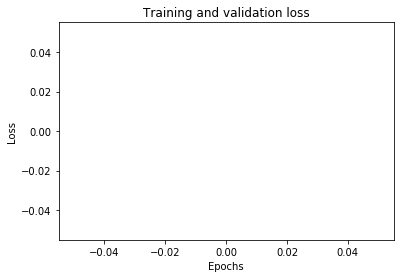

In [22]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

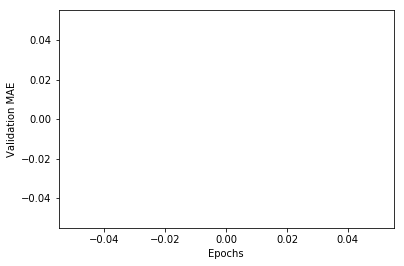

In [23]:
mae_history = history.history['val_mean_absolute_error']

plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.show()

In [24]:
arr_model = models.Sequential()
arr_model.add(layers.Dense(64, activation='relu',
                      input_shape=(x_train.shape[1],)))
arr_model.add(layers.Dense(64, activation='relu'))
arr_model.add(layers.Dense(64, activation='relu'))
arr_model.add(layers.Dense(1))
arr_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

arr_model.fit(x_train, y_train,
         epochs=75, batch_size=128, verbose=0)
results = model.evaluate(x_test, y_test)

84100/84100 [==============================] - 3s 40us/step


In [25]:
results[0]

nan

In [26]:
predictions = model.predict(x_test)
predicted_df = pd.DataFrame(predictions,columns=['Predicted Error'])

In [27]:
# stand_feat = pd.DataFrame(x_test,columns=flight_data.columns[:-1])

In [28]:
unstand_predict = (predicted_df * stdE) + meanE
unstand_predict.head()

NameError: name 'stdE' is not defined

In [ ]:
test_df = pd.DataFrame(y_test,columns=['True Error'])
unstand_test = (test_df * stdE) + meanE
unstand_test.head()

In [ ]:
r2_score(y_test,predictions)

In [ ]:
print(meanE)
print(stdE)